<a href="https://colab.research.google.com/github/kkitonga/UnsupervisedLearning/blob/main/Clustering_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering Techniques covered here:**
1.KMeans
2.Gaussian Mixture
3.KMediods

Importing libraries and overview of the dataset¶

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import matplotlib.pyplot as plt

import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
#### mounting drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/Country-data.csv')

In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.shape

(167, 10)

In [ ]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
round(data.isna().sum()/len(data)*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [ ]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [ ]:
data.duplicated().sum()

0

**Exploratory data annalysis**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


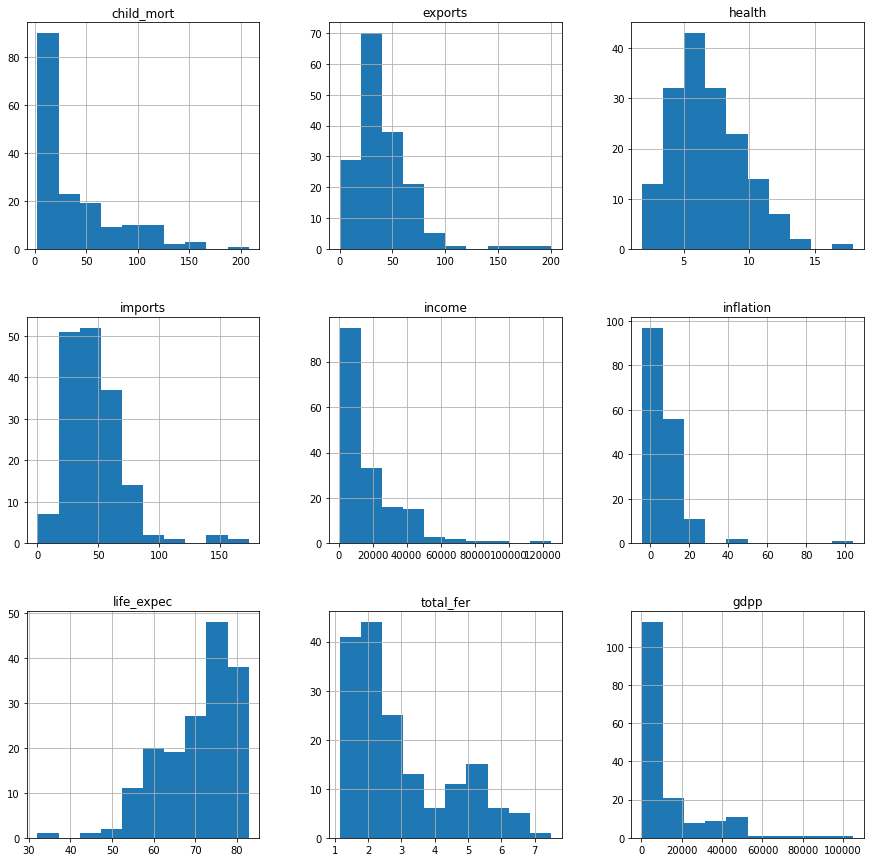

In [ ]:

data.hist(figsize=(15,15))
plt.show()

In [ ]:
#### Check distribution and outliers




child_mort
Skew : 1.45


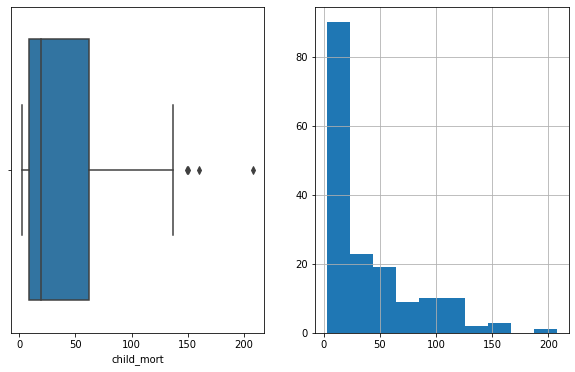

exports
Skew : 2.45


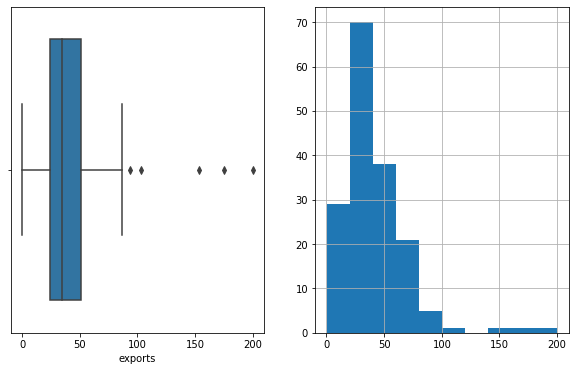

health
Skew : 0.71


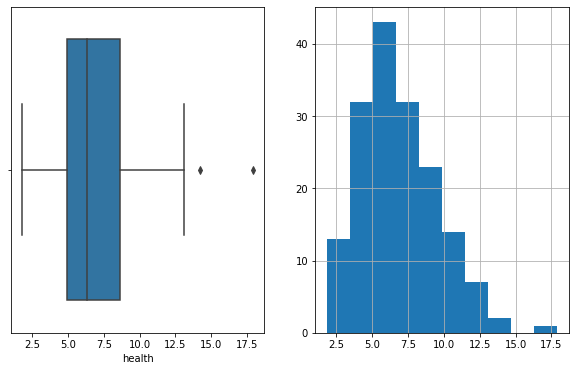

imports
Skew : 1.91


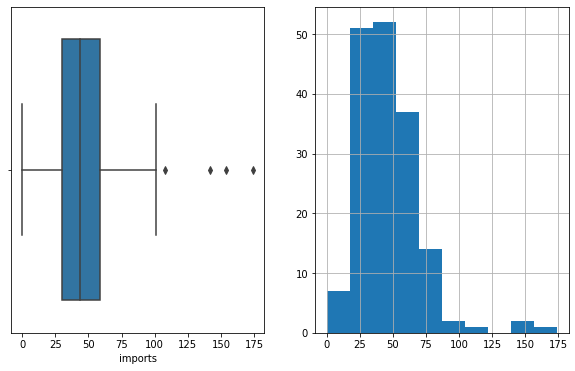

income
Skew : 2.23


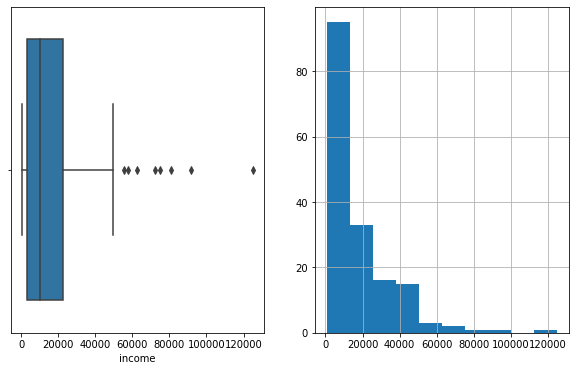

inflation
Skew : 5.15


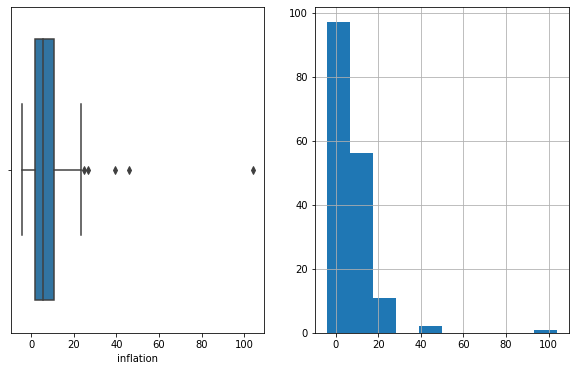

life_expec
Skew : -0.97


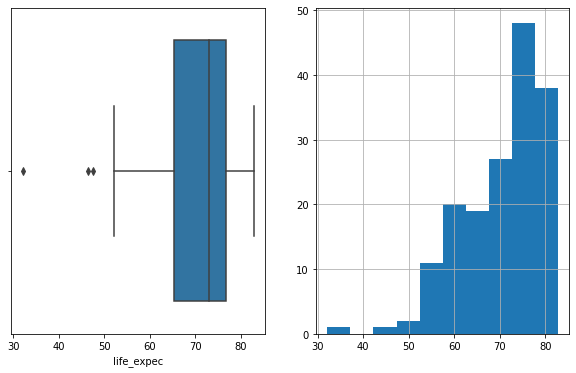

total_fer
Skew : 0.97


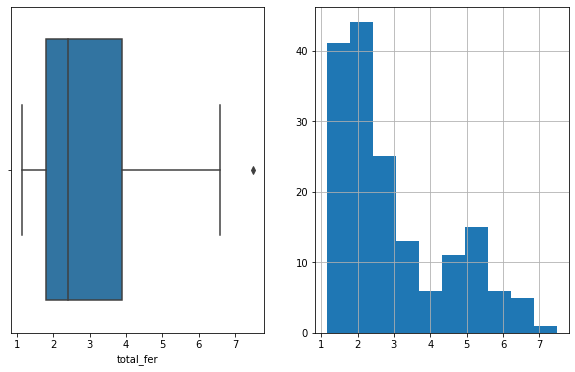

In [ ]:
for i in data.iloc[:,1:9]:
  plt.figure(figsize=(10,6))
  print(i)
  print('Skew :',round(data[i].skew(),2))
  plt.subplot(121)
  sns.boxplot(data[i])
  plt.subplot(122)
  data[i].hist()
  plt.show()

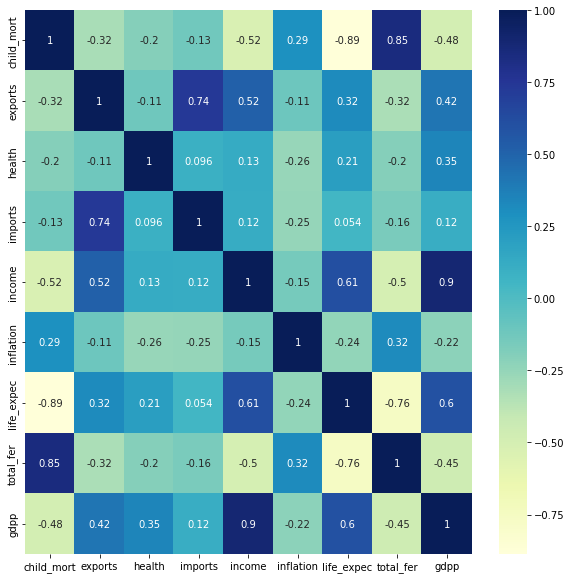

In [ ]:
#### corelation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

Scaling data

In [6]:
data_new = data.drop(columns=['country','gdpp'])

In [7]:
##### scaling data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_new),columns=data_new.columns)

In [8]:
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [9]:
data_scaled_copy = data_scaled.copy(deep=True)

K-means clustering

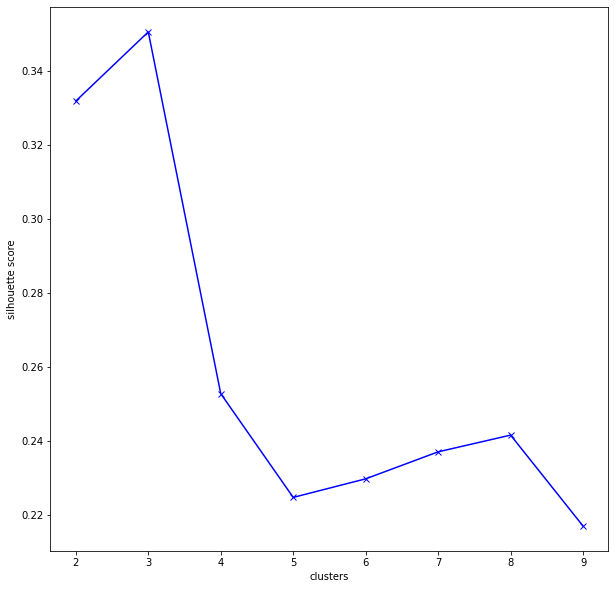

In [11]:
sc = {}
for k in range(2,10):
   kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
   labels = kmeans.predict(data_scaled)
   sc[k] = silhouette_score(data_scaled, labels)

#### plot
plt.figure(figsize=(10,10))
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.xlabel('clusters')
plt.ylabel('silhouette score')
plt.show()

Perfoming K-means

In [14]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(data_scaled)
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [15]:
data['KMeans_Labels'].value_counts(normalize=True)

0    0.670659
1    0.311377
2    0.017964
Name: KMeans_Labels, dtype: float64

In [16]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

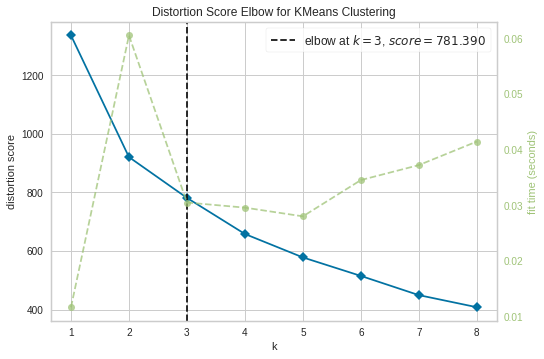

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,9))
visualizer.fit(data_scaled)
visualizer.show()


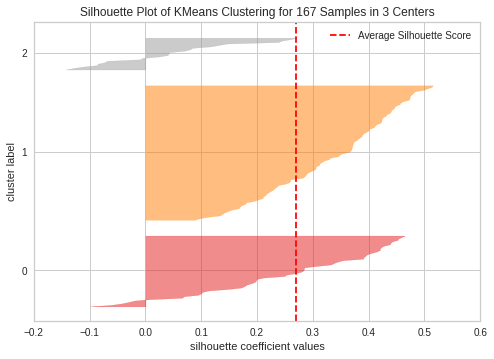

In [21]:
model=KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_scaled)
visualizer.show()

In [31]:
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
dfkmeans = pd.concat([mean,median],axis=0)
dfkmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
dfkmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36
gdpp,16937.535714,1832.884615,57566.666667,8580.000,932.00,46600.00


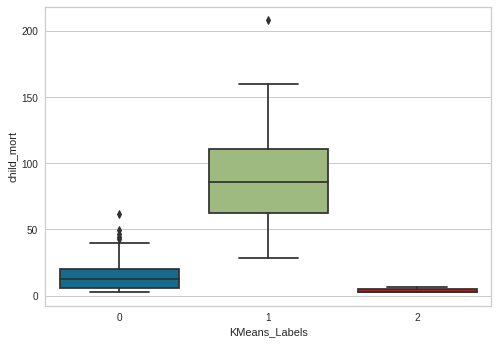

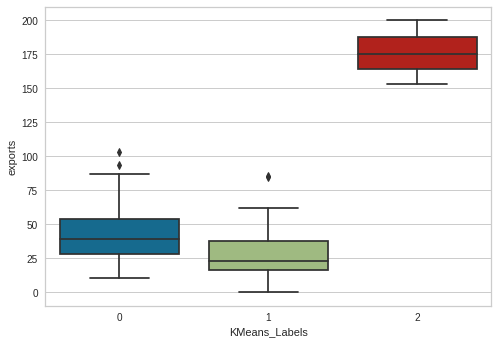

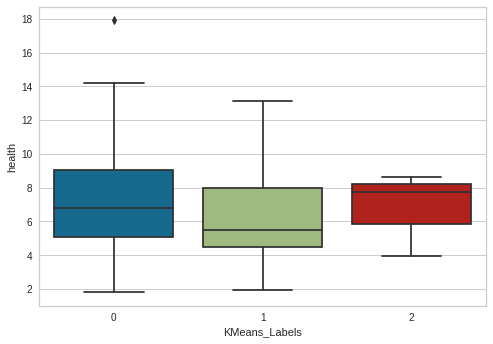

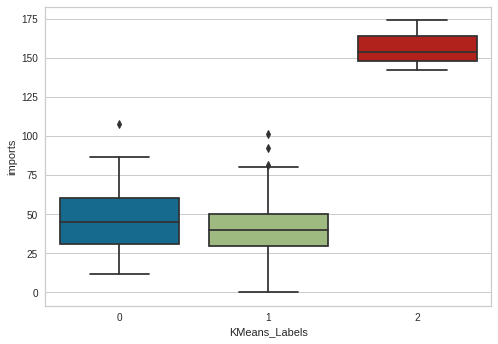

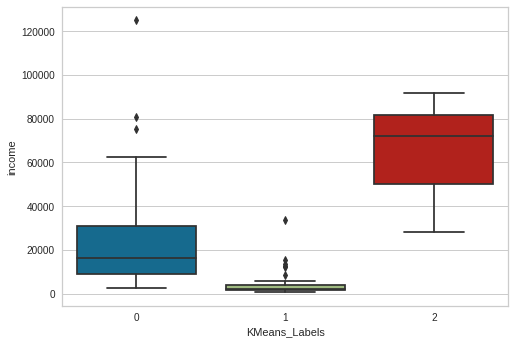

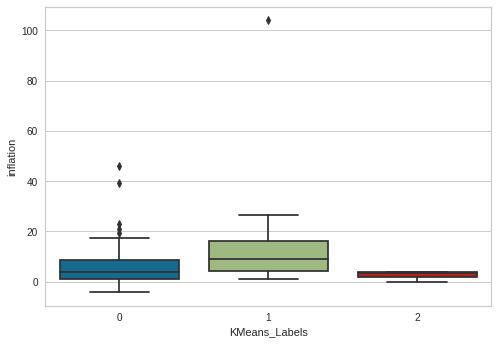

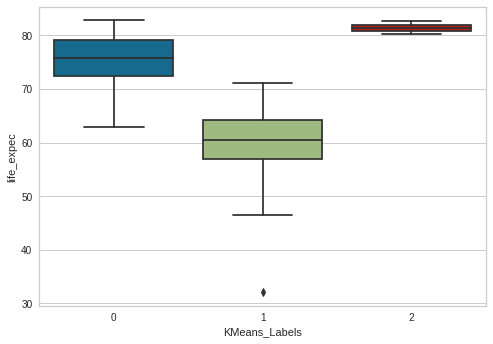

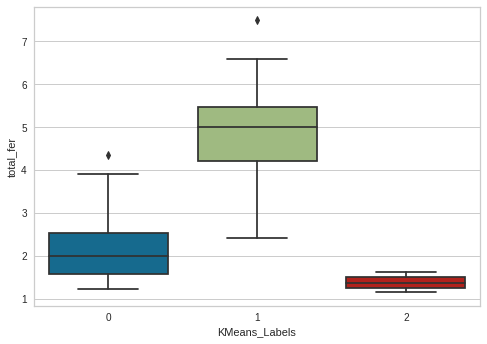

In [43]:
for i in data.iloc[:,1:9]:
  sns.boxplot(x=data['KMeans_Labels'], y=data[i])
  plt.show()





In [44]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


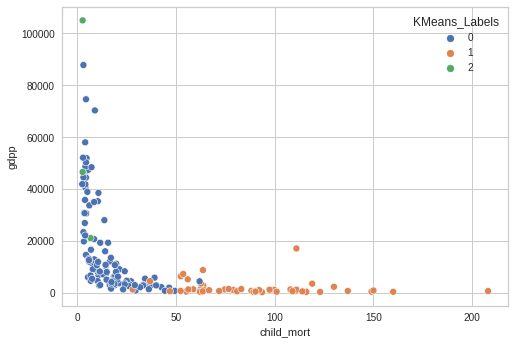

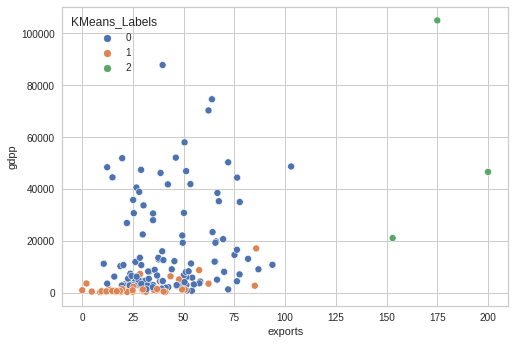

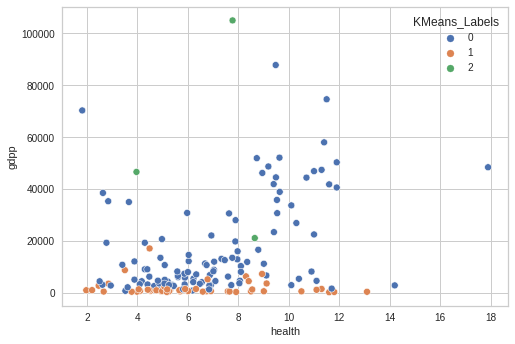

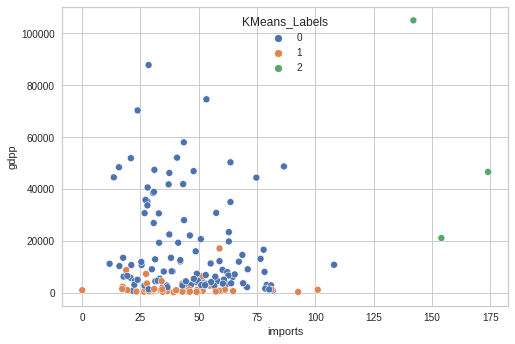

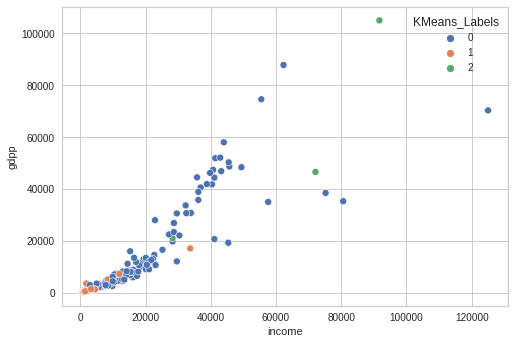

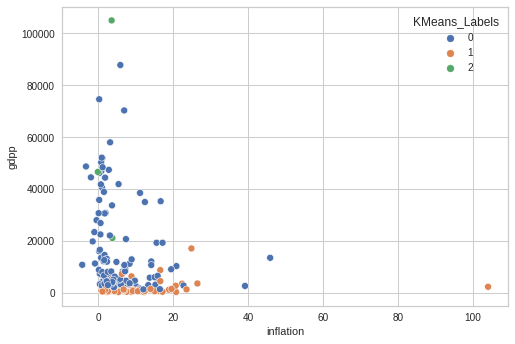

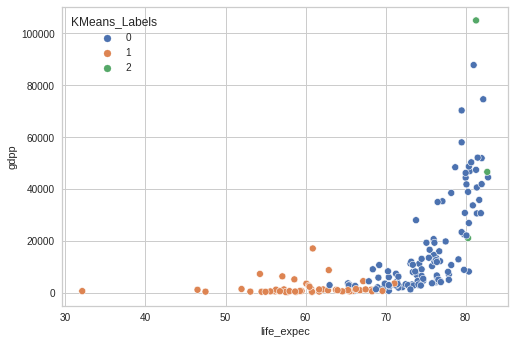

In [48]:
for i in data.iloc[:,1:8]:
  sns.scatterplot(data=data,x=i,y='gdpp',hue='KMeans_Labels',palette='deep')
  plt.show()

kmedoids

In [50]:
#!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.9 MB/s 


In [70]:
from sklearn_extra.cluster import KMedoids
kmedoid = KMedoids(n_clusters=3,random_state=1)
kmedoid.fit(data_scaled)
data['kmedoLabels'] = kmedoid.predict(data_scaled)
data_scaled_copy['kmedoLabels'] = kmedoid.predict(data_scaled)
data['kmedoLabels'].value_counts(normalize=True)




1    0.449102
2    0.347305
0    0.203593
Name: kmedoLabels, dtype: float64

In [67]:


mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
dfkmedoids = pd.concat([mean,median],axis=0)
dfkmedoids



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
kmedoLabels,,,,,,,,,
0,7.085294,36.938235,9.413235,33.452941,38094.705882,4.020676,79.614706,1.842353,35925.588235
1,17.853333,52.989333,6.202133,57.694667,17592.800000,5.511573,73.870667,2.179600,10989.813333
2,82.951724,28.191362,6.086379,40.795964,4284.189655,12.922328,60.958621,4.589655,2057.034483
0,4.700000,31.600000,9.585000,30.750000,36550.000000,1.825000,80.200000,1.875000,38700.000000
1,15.700000,48.300000,6.000000,55.100000,13500.000000,3.820000,74.100000,2.130000,6230.000000
2,79.600000,23.800000,5.275000,36.800000,2145.000000,9.225000,60.800000,4.875000,994.000000


In [68]:
dfkmedoids.index=['group0mean','group1mean','group2mean','group0median','group1median','group2median']


In [69]:
dfkmedoids.T

,group0mean,group1mean,group2mean,group0median,group1median,group2median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000


In [72]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmedoLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


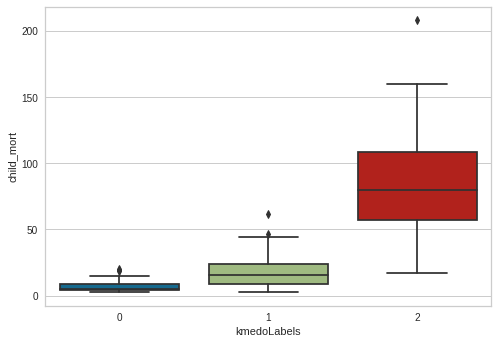

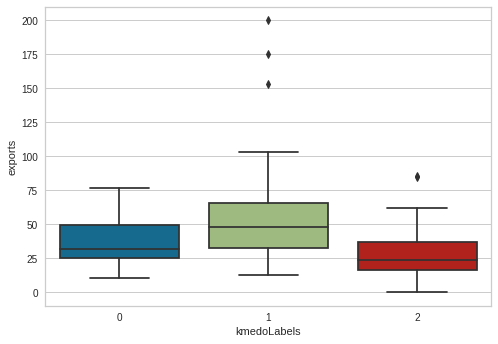

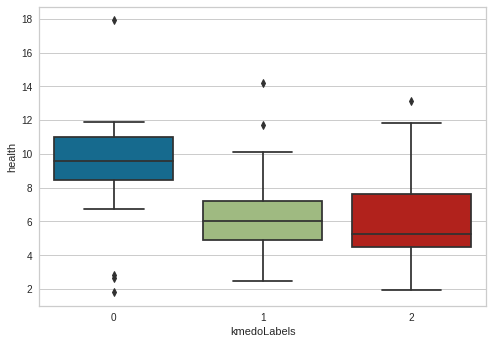

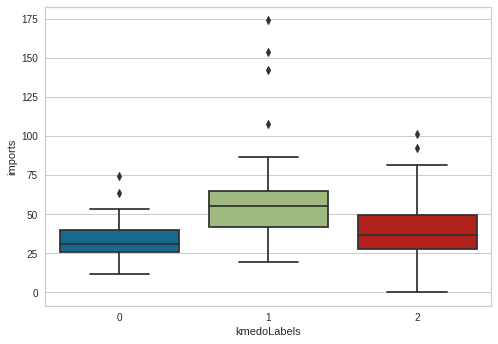

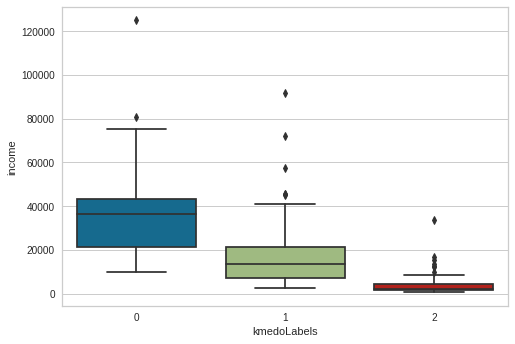

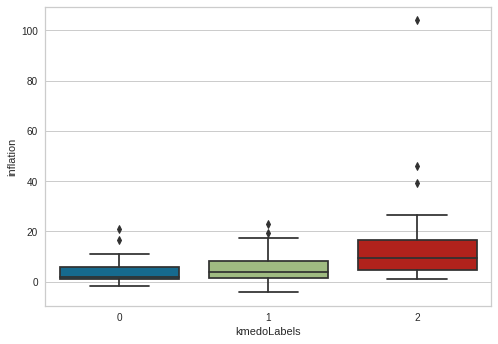

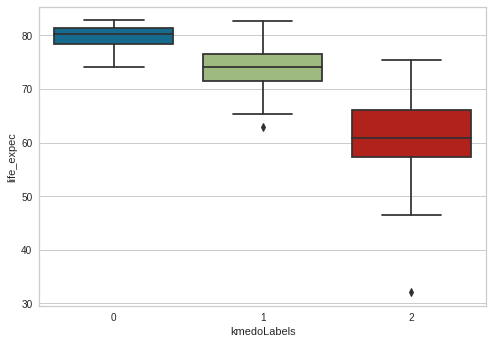

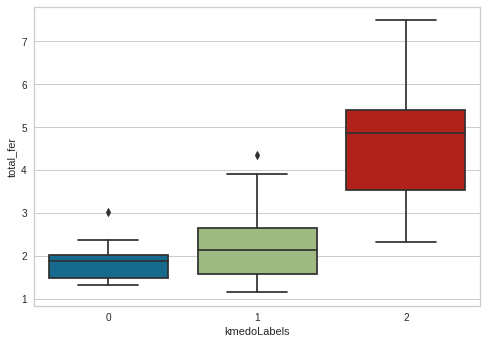

In [73]:
for i in data.iloc[:,1:9]:
  sns.boxplot(x='kmedoLabels',y=i,data=data)
  plt.show()


**Gaussian Mixture Clustering**

In [77]:
gs = GaussianMixture(n_components=3,random_state=1)
gs.fit(data_scaled)
data_scaled_copy['gs_labels'] =gs.predict(data_scaled)
data['gs_labels'] = gs.predict(data_scaled)


In [79]:
data['gs_labels'].value_counts(normalize=True)

0    0.401198
2    0.371257
1    0.227545
Name: gs_labels, dtype: float64

In [87]:
col = ['child_mort',	'exports'	,'health',	'imports',	'income',	'inflation',	'life_expec',	'total_fer',	'gdpp']
mean = data.groupby('gs_labels').mean()
median = data.groupby('gs_labels').median()
dfgs = pd.concat([mean,median])
dfgs.index = ['group0mean','group1mean','group2mean','group0median','group1median','group2meadian']
dfgs[col].T

,group0mean,group1mean,group2mean,group0median,group1median,group2meadian
child_mort,76.459701,5.544737,17.058065,66.80,4.250,16.550
exports,30.704463,60.047368,40.745161,25.00,50.900,35.400
health,6.140000,8.444737,6.547419,5.30,9.405,6.440
imports,43.886058,51.736842,47.166129,42.90,40.950,48.250
income,4578.850746,45431.578947,13386.774194,2520.00,40900.000,12800.000
inflation,11.796642,3.538553,6.043968,8.43,1.395,4.465
life_expec,62.070149,79.707895,74.116129,61.80,80.200,74.150
total_fer,4.404776,1.791579,2.082419,4.60,1.850,2.040
gdpp,2235.880597,40707.105263,7553.870968,1170.00,39750.000,6240.000


In [88]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmedoLabels,gs_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2


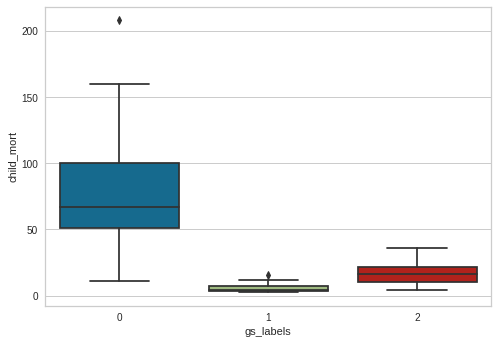

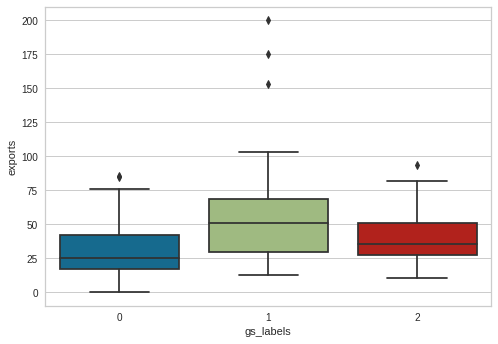

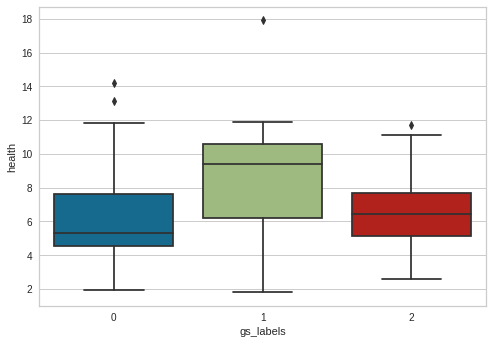

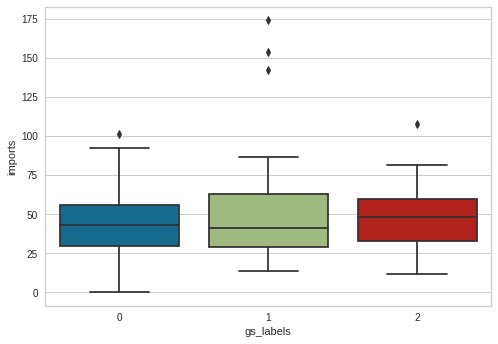

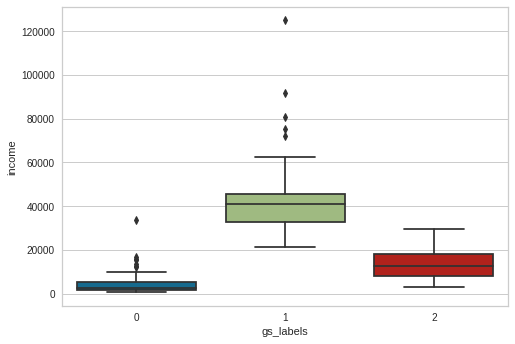

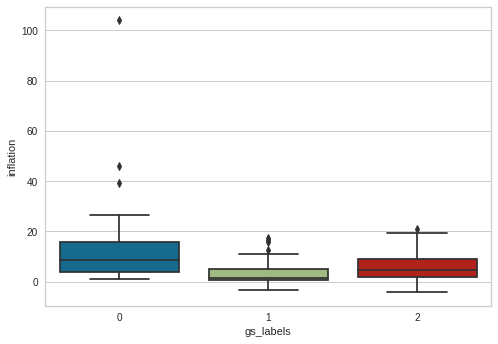

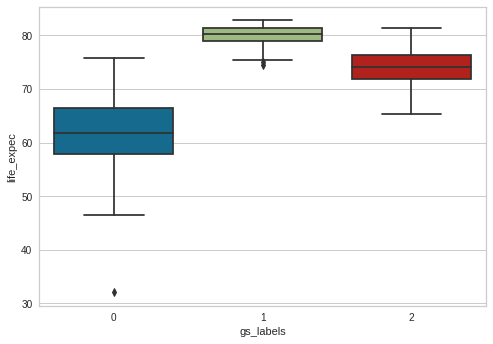

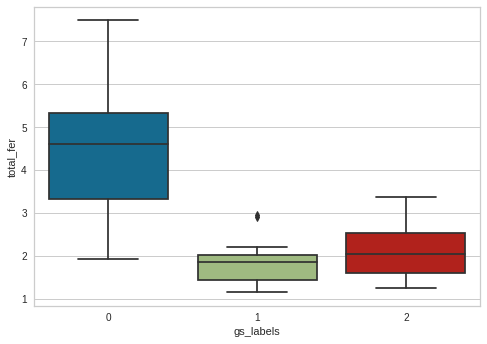

In [91]:
for i in data.iloc[:,1:9]:
  sns.boxplot(data=data,x='gs_labels',y=i)
  plt.show()